In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../data/311.csv', low_memory=False)

In [7]:
df.head()

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
0,101000295613,2011-06-30 21:32:33,2011-07-14 21:32:32,2011-07-01 01:06:58,ONTIME,Closed,Case Closed Case Resolved replaced 100 amp fus...,Street Light Outages,Public Works Department,Street Lights,...,Greater Mattapan,7,Ward 17,1714,INTERSECTION Groveland St & River St,NaN,42.271544,-71.077221,0101000020E6100000CC4F6F30F1C451C0ADBC83F5C122...,Employee Generated
1,101000295614,2011-06-30 22:18:31,2011-07-04 22:18:31,2011-07-01 02:12:43,ONTIME,Closed,Case Closed Case Scheduled Items have been sch...,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,...,Roslindale,10,Ward 20,2008,39 Lorraine St,2131.0,42.283850,-71.144741,0101000020E6100000C960F36E43C951C06CE46A2F5524...,Self Service
2,101000295615,2011-06-30 22:28:04,2011-08-14 22:28:04,2011-08-01 11:21:46,ONTIME,Closed,Case Closed Case Resolved No Sidewalk and poor...,New Sign Crosswalk or Pavement Marking,Transportation - Traffic Division,Signs & Signals,...,West Roxbury,12,Ward 20,2017,INTERSECTION Corey St & Lagrange St,NaN,42.300278,-71.169805,0101000020E6100000B311E014DECA51C0A1102F826F26...,Self Service
3,101000295616,2011-06-30 23:03:48,2011-07-14 23:03:48,2011-07-22 12:13:45,OVERDUE,Closed,Case Closed Case Resolved completed,Street Light Outages,Public Works Department,Street Lights,...,Hyde Park,10,Ward 18,1816,235 Fairmount Ave,2136.0,42.249640,-71.115631,0101000020E61000003219CE7E66C751C0DDF2D930F41F...,Self Service
4,101000295617,2011-06-30 23:12:31,NaN,2011-07-01 02:12:38,ONTIME,Closed,Case Closed Case Resolved,Highway Maintenance,Public Works Department,Highway Maintenance,...,Dorchester,7,Ward 13,1309,INTERSECTION Dorchester Ave & Hallam St,NaN,42.314436,-71.056878,0101000020E6100000615079E5A3C351C0C71CEA6D3F28...,Constituent Call


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708648 entries, 0 to 2708647
Data columns (total 30 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   case_enquiry_id                 int64  
 1   open_dt                         object 
 2   sla_target_dt                   object 
 3   closed_dt                       object 
 4   on_time                         object 
 5   case_status                     object 
 6   closure_reason                  object 
 7   case_title                      object 
 8   subject                         object 
 9   reason                          object 
 10  type                            object 
 11  queue                           object 
 12  department                      object 
 13  submitted_photo                 object 
 14  closed_photo                    object 
 15  location                        object 
 16  fire_district                   object 
 17  pwd_district               

In [14]:
df['on_time'].value_counts()

on_time
ONTIME     2186348
OVERDUE     521629
Name: count, dtype: int64

In [9]:
df['case_status'].value_counts()

case_status
Closed    2513216
Open       195432
Name: count, dtype: int64

In [15]:
print(df['closure_reason'].value_counts()[:10])
print('...')
print(df['closure_reason'].nunique() - 10, 'more unique values')

closure_reason
                                                                     194855
Case Closed Bulk Item Automation                                      59893
Case Closed Case Resolved                                             49658
Case Closed Internal Case Performed by Highway Maintenance crew.      33824
Case Closed Case Noted                                                11712
Case Closed :                                                         11506
Case Closed Case Noted Snow has been removed.                          9026
Case Closed Case Scheduled Items have been scheduled for pickup.       8989
Case Closed Case Resolved                                              8131
Case Closed Case Noted                                                 7679
Name: count, dtype: int64
...
2092511 more unique values


In [13]:
print(df['case_title'].value_counts()[:10])
print('...')
print(df['case_title'].nunique() - 10, 'more unique values')

case_title
Parking Enforcement                    351363
Requests for Street Cleaning           181376
Schedule a Bulk Item Pickup            163564
Request for Pothole Repair             115760
Improper Storage of Trash (Barrels)    105954
CE Collection                           85024
Request for Snow Plowing                66950
Tree Maintenance Requests               59220
Sign Repair                             58648
Schedule Bulk Item Pickup               55707
Name: count, dtype: int64
...
27044 more unique values


In [17]:
df['subject'].value_counts()

subject
Public Works Department              1529747
Transportation - Traffic Division     550065
Inspectional Services                 243634
Parks & Recreation Department         168073
Mayor's 24 Hour Hotline               115724
Property Management                    46163
Animal Control                         33563
Boston Water & Sewer Commission        15654
Boston Police Department                3485
Disability Department                   2112
Neighborhood Services                    274
Consumer Affairs & Licensing             152
Veterans                                   1
CRM Application                            1
Name: count, dtype: int64

In [19]:
print(df['reason'].value_counts()[:10])
print('...')
print(df['reason'].nunique() - 10, 'more unique values')

reason
Enforcement & Abandoned Vehicles    397805
Street Cleaning                     389879
Sanitation                          384038
Highway Maintenance                 312892
Code Enforcement                    209255
Signs & Signals                     135455
Street Lights                       116869
Recycling                           104147
Trees                               101336
Building                             95213
Name: count, dtype: int64
...
44 more unique values


In [21]:
print(df['type'].value_counts()[:10])
print('...')
print(df['type'].nunique() - 10, 'more unique values')

type
Parking Enforcement                            351876
Requests for Street Cleaning                   187086
Schedule a Bulk Item Pickup                    163575
Missed Trash/Recycling/Yard Waste/Bulk Item    136573
Request for Pothole Repair                     124451
Improper Storage of Trash (Barrels)            106098
CE Collection                                   85058
Street Light Outages                            84236
Request for Snow Plowing                        67134
Tree Maintenance Requests                       62929
Name: count, dtype: int64
...
202 more unique values


In [22]:
print(df['queue'].value_counts()[:10])
print('...')
print(df['queue'].nunique() - 10, 'more unique values')

queue
BTDT_Parking Enforcement                            346349
PWDx_Code Enforcement                               221121
PWDx_Schedule a Bulk Item Pickup                    219225
PWDx_Missed Trash\Recycling\Yard Waste\Bulk Item    147819
ISD_Building (INTERNAL)                              93545
ISD_Housing (INTERNAL)                               84089
PWDx_District 1C: Downtown                           81206
PWDx_District 03: North Dorchester                   56563
PWDx_Street Light Outages                            55201
INFO01_GenericeFormforOtherServiceRequestTypes       54666
Name: count, dtype: int64
...
171 more unique values


In [23]:
df['department'].value_counts()

department
PWDx    1472733
BTDT     549725
ISD      245201
PARK     158854
INFO     143203
GEN_      53496
PROP      39572
BWSC      32465
ANML       5961
DISB       2409
BPD_       2042
BPS_       1051
BHA_        877
ONS_        615
DND_        321
No Q        111
GRNi          6
ECON          4
Temp          2
Name: count, dtype: int64

In [69]:
print(f"There are {df['closed_photo'].shape[0] - df['closed_photo'].isna().sum()} non-null values in the closed_photo column")
print(f"There are {df['closed_photo'].isna().sum()} null values in the closed_photo column")

There are 249076 non-null values in the closed_photo column
There are 2459572 null values in the closed_photo column


In [71]:
print(df['location'].value_counts()[:10])
print('...')
print(df['location'].nunique() - 10, 'more unique values')

location
                                                                             54745
1 City Hall Plz  Boston  MA  02108                                            6217
100 City Hall Plz  Boston  MA  02108                                          2071
75 W Rutland Sq  Roxbury  MA  02118                                            937
544P Massachusetts Ave  Roxbury  MA  02118                                     763
124 Main St  Charlestown  MA  02129                                            700
INTERSECTION of Boylston St & Park Dr  Boston  MA                              692
INTERSECTION of Massachusetts Ave & Melnea Cass Blvd  Roxbury  MA              682
INTERSECTION of Public Alley No. 432 & Public Alley No. 433  Boston  MA        678
1535 Washington St  Roxbury  MA  02118                                         678
Name: count, dtype: int64
...
148367 more unique values


In [73]:
df['fire_district'].value_counts()

fire_district
4     415837
7     342982
9     326636
3     324221
12    312069
8     303917
6     246124
11    208432
1     165907
       56817
10        70
5         45
Name: count, dtype: int64

In [74]:
df['pwd_district'].value_counts()

pwd_district
1C     379017
07     282736
03     278385
05     218103
04     211887
1B     200480
02     182534
10B    178531
06     174729
09     165610
10A    149252
08     140923
1A      87990
        56072
2         280
9         271
5         169
3         143
4          86
6          51
7          27
8           5
Name: count, dtype: int64

In [75]:
df['city_council_district'].value_counts()

city_council_district
2    474250
1    381005
7    300999
6    281029
3    261594
5    246194
8    242401
4    234577
9    228357
      54755
0      3185
Name: count, dtype: int64

In [81]:
df['police_district'].value_counts()

police_district
D4      379982
A1      296856
C11     295341
B2      262713
C6      250061
D14     211863
E5      195571
B3      176584
E13     174293
A7      165906
E18     154034
A15      87973
         56071
C-11        67
B-2         62
E-13        41
E-5         31
D-14        28
A-15        21
E-18        19
B-3         17
D-4         13
C-6          8
A-7          6
Name: count, dtype: int64

In [82]:
df['neighborhood'].value_counts()

neighborhood
Dorchester                                      398539
Roxbury                                         243294
South Boston / South Boston Waterfront          199575
Allston / Brighton                              191233
Jamaica Plain                                   169094
East Boston                                     165958
Downtown / Financial District                   154352
South End                                       148814
Back Bay                                        125802
Hyde Park                                       122358
Greater Mattapan                                118790
West Roxbury                                    111547
Roslindale                                      105994
Charlestown                                      88046
Boston                                           82439
Beacon Hill                                      72958
Fenway / Kenmore / Audubon Circle / Longwood     56003
                                                 547

In [83]:
df['ward'].value_counts()

ward
Ward 18    168944
Ward 5     144116
Ward 3     129471
Ward 20    127474
Ward 1     124185
Ward 14     88594
Ward 22     88390
Ward 6      87158
Ward 17     86087
Ward 16     84448
Ward 7      82885
Ward 19     81191
Ward 21     75691
Ward 4      70018
Ward 13     63292
3           60779
Ward 11     59663
Ward 15     55558
            54755
Ward 2      54036
Ward 8      53329
Ward 12     51557
03          49948
Ward 10     49627
Ward 9      47722
5           47516
18          38975
21          34804
20          28680
11          26551
4           26427
19          26310
22          26249
05          25515
06          25196
14          25048
6           24680
16          24435
8           21379
04          21170
12          20914
1           20898
01          20879
10          20121
2           19031
7           18218
13          17512
9           17067
08          16802
09          16739
17          15756
02          14904
07          14160
15          12327
0            1272
00   

In [85]:
print(df['precinct'].value_counts()[:10])
print('...')
print(df['precinct'].nunique() - 10, 'more unique values')

precinct
0306    64269
        63274
0308    49132
0501    41768
0802    33755
0601    33202
0307    31859
0509    28487
0504    26098
0301    25622
Name: count, dtype: int64
...
245 more unique values


In [88]:
print(df['location_street_name'].value_counts()[:10])
print('...')
print(df['location_street_name'].nunique() - 10, 'more unique values')

location_street_name
1 City Hall Plz                                             6246
100 City Hall Plz                                           2071
75 W Rutland Sq                                              937
544P Massachusetts Ave                                       763
INTERSECTION Columbus Ave & Centre St                        701
124 Main St                                                  700
INTERSECTION Boylston St & Park Dr                           692
INTERSECTION Massachusetts Ave & Melnea Cass Blvd            682
INTERSECTION Public Alley No. 432 & Public Alley No. 433     678
1535 Washington St                                           678
Name: count, dtype: int64
...
144996 more unique values


In [89]:
df['location_zipcode'].value_counts()

location_zipcode
2127.0    161329
2124.0    160182
2128.0    139949
2130.0    124950
2118.0    121989
2125.0    115522
2135.0    115067
2119.0     97109
2116.0     95406
2132.0     93811
2131.0     92691
2136.0     88122
2121.0     81447
2122.0     80397
2126.0     78520
2129.0     63872
2114.0     59484
2134.0     54708
2115.0     48270
2113.0     43050
2120.0     38938
2215.0     38651
2108.0     34246
2111.0     24877
2109.0     18428
2210.0     11020
2110.0      8718
2467.0      1798
2199.0      1471
2163.0       197
2203.0       166
2133.0        67
2201.0        29
2446.0        25
2222.0        11
2167.0         9
2146.0         6
2445.0         6
Name: count, dtype: int64

In [90]:
print(f'There are {df["latitude"].shape[0] - df["latitude"].isna().sum()} non-null values in the latitude column')
print(f'There are {df["latitude"].isna().sum()} null values in the latitude column')

There are 2664628 non-null values in the latitude column
There are 44020 null values in the latitude column


In [91]:
print(f'There are {df["longitude"].shape[0] - df["longitude"].isna().sum()} non-null values in the longitude column')
print(f'There are {df["longitude"].isna().sum()} null values in the longitude column')

There are 2664628 non-null values in the longitude column
There are 44020 null values in the longitude column


In [93]:
print(f"There are {df['geom_4326'].shape[0] - df['geom_4326'].isna().sum()} non-null values in the geom_4326 column")
print(f"There are {df['geom_4326'].isna().sum()} null values in the geom_4326 column")

There are 2664628 non-null values in the geom_4326 column
There are 44020 null values in the geom_4326 column


In [94]:
df['source'].value_counts()

source
Constituent Call        1123696
Citizens Connect App     984531
City Worker App          273133
Employee Generated       160558
Self Service             156802
Maximo Integration         8330
Twitter                    1598
Name: count, dtype: int64

# Plotting

In [114]:
def na_vs_non_na(column):
    # plot using sns
    sns.set(style="darkgrid")
    numNa = df[column].isna().sum()
    numNonNa = df[column].shape[0] - numNa

    # if the ratio is more than 1:1000, then return

    if numNa == 0:
        print(f'There are no null values in the column: {column}')
        return
    if numNonNa / numNa > 1000:
        print(f'There are {numNa} null values and {numNonNa} non-null values in the column: {column}')
        return
    

    plt.figure(figsize=(10, 6))
    fig = sns.barplot(x=['null', 'non-null'], y=[numNa, numNonNa])

    fig.bar_label(fig.containers[0])
    
    plt.title(f'Null vs Non-Null values for column: {column}')
    plt.show()

There are no null values in the column: case_enquiry_id
There are no null values in the column: open_dt


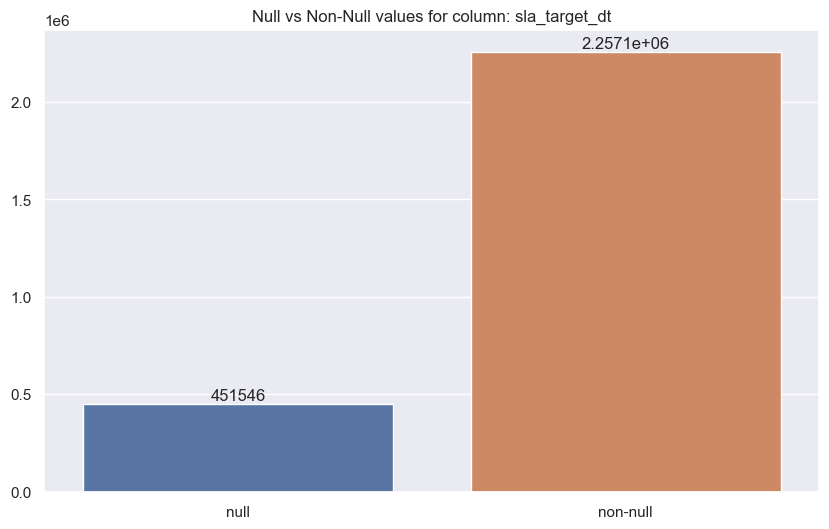

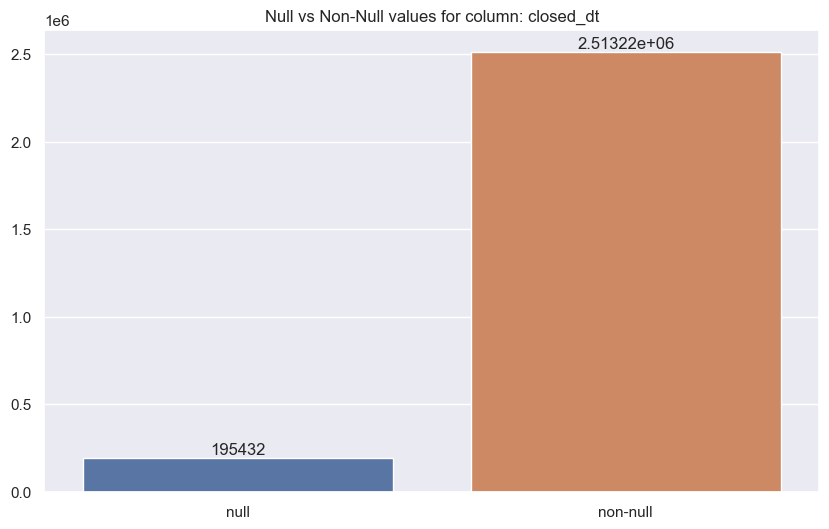

There are 671 null values and 2707977 non-null values in the column: on_time
There are no null values in the column: case_status
There are no null values in the column: closure_reason
There are 544 null values and 2708104 non-null values in the column: case_title
There are no null values in the column: subject
There are no null values in the column: reason
There are no null values in the column: type
There are no null values in the column: queue
There are no null values in the column: department


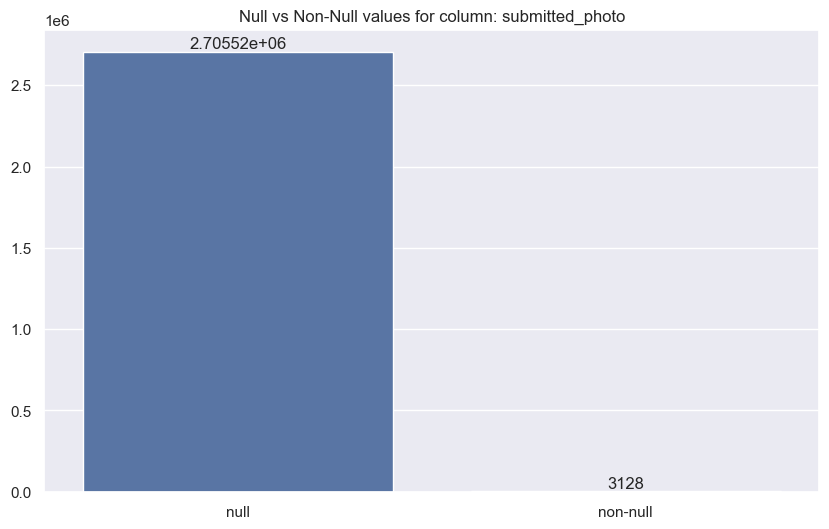

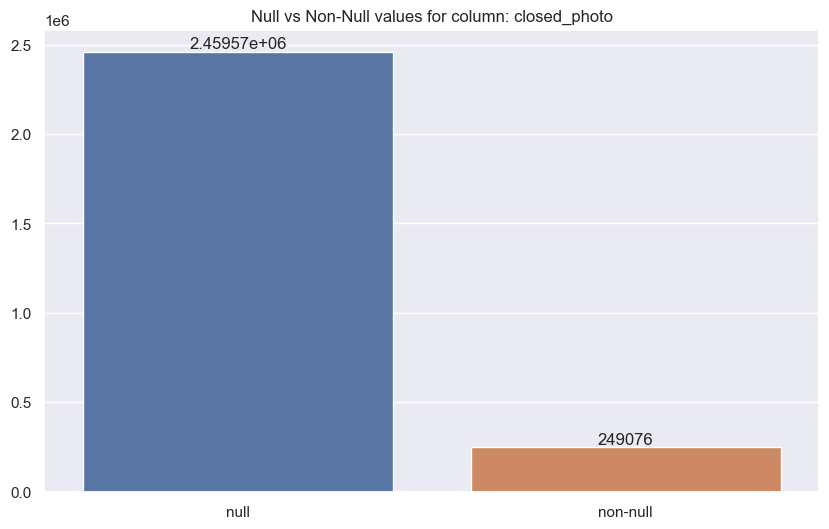

There are no null values in the column: location


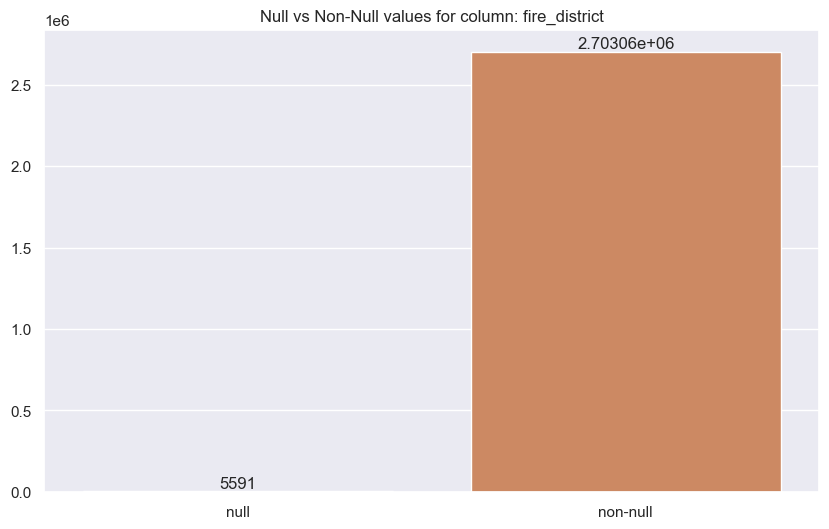

There are 1367 null values and 2707281 non-null values in the column: pwd_district
There are 302 null values and 2708346 non-null values in the column: city_council_district
There are 1087 null values and 2707561 non-null values in the column: police_district
There are 2652 null values and 2705996 non-null values in the column: neighborhood
There are 308 null values and 2708340 non-null values in the column: neighborhood_services_district
There are 180 null values and 2708468 non-null values in the column: ward
There are 1726 null values and 2706922 non-null values in the column: precinct


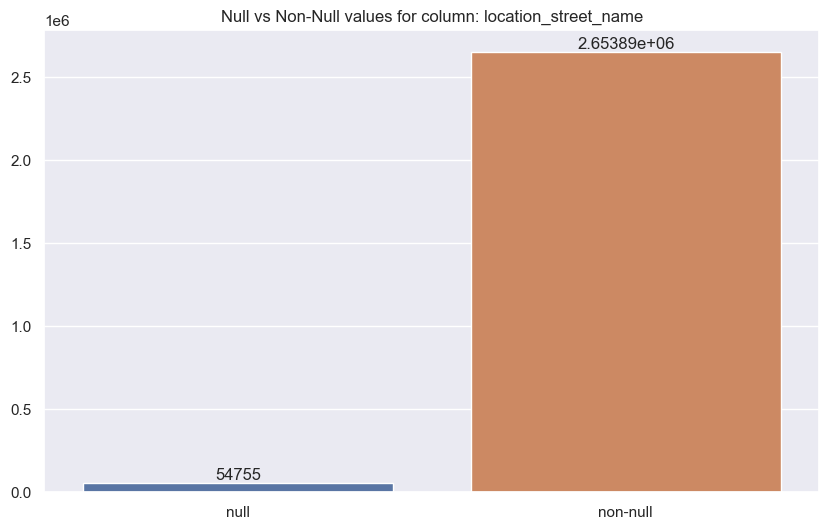

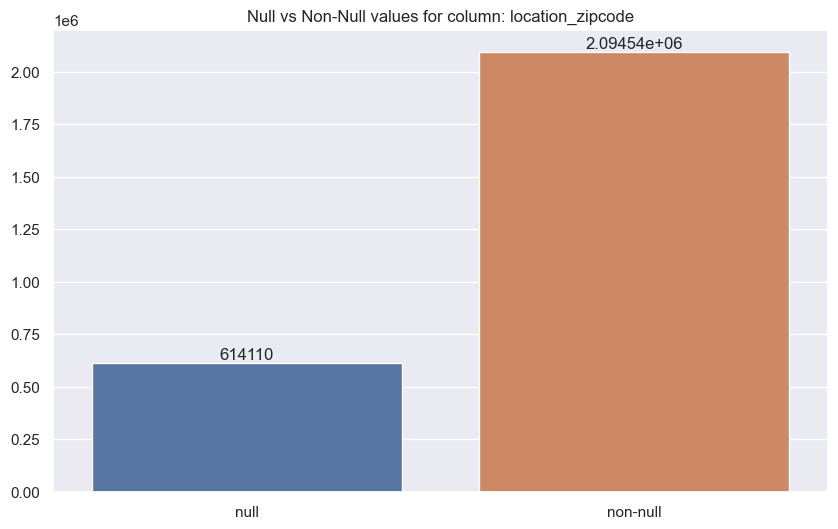

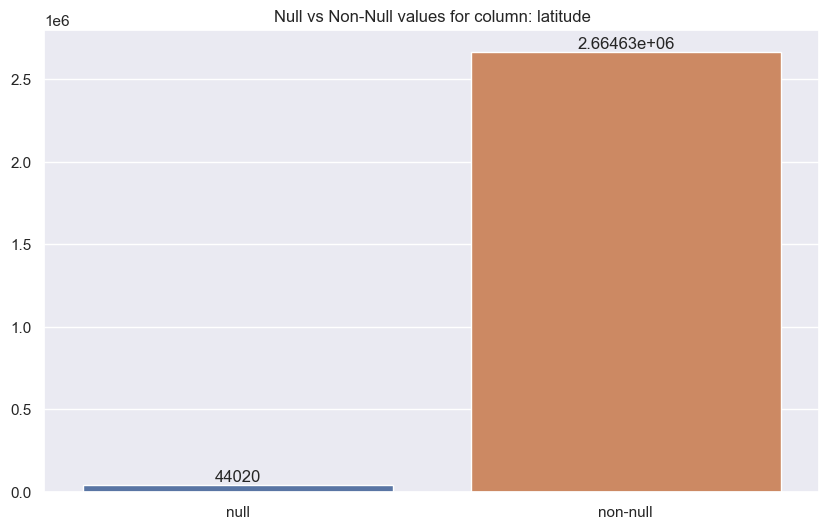

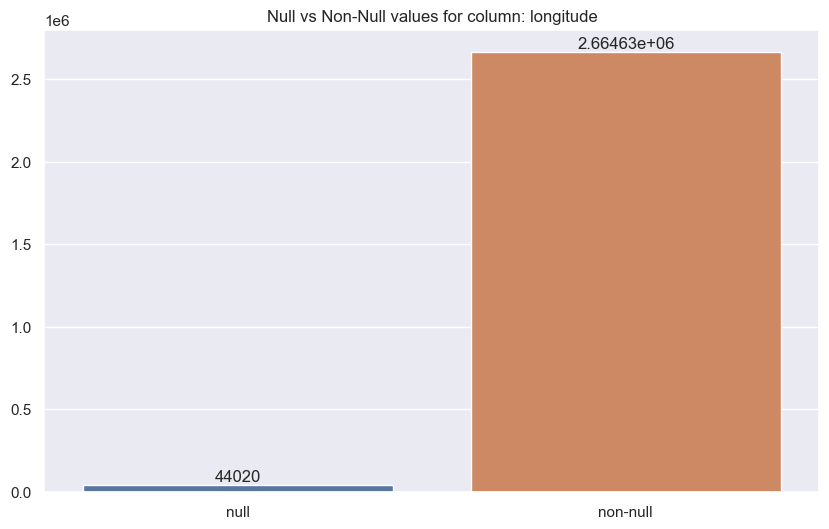

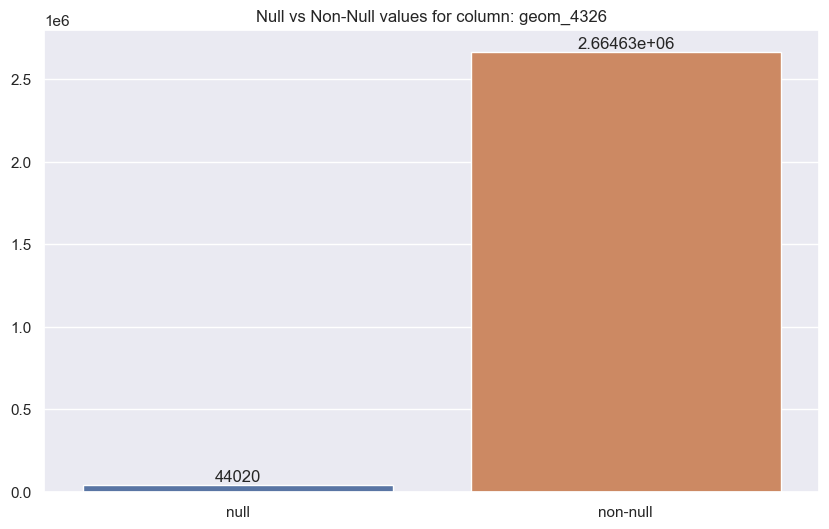

There are no null values in the column: source


In [115]:
for column in df.columns:
    na_vs_non_na(column)